# Notes:

You are banned from using loops (`for` or `while` or any other) for this entire workshop!

You shouldn't be using loops almost ever with pandas in any case, so break out of the habit now.

## 1. DataFrame basics


Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

**2.** Select only the rows where visits are 3 or more. Which types of animals are these?

**3.** Select the rows where visists are 3 and the animal is a cat

**4.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

**5.** Calculate the mean age for each different animal in `df`.

**6.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.



In [37]:
import pandas as pd 
import numpy as np 

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}


labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

# 1
df = pd.DataFrame(data, index=labels)
print(df)
# 2
print('#2 animals that visited the vet 3\n', df.loc[df['visits'] >= 3]) 

# 3
print('#3 cats that visited the vet 3\n', df.loc[ (df['animal'] == 'cat') & (df['visits'] >= 3) ]) 

# 4
print('#4 sum of all visits\n', df['visits'].sum())

# 5
print('#5 mean of age of animals', (df.groupby(['animal', 'age'], as_index=False).mean().groupby('animal')['age'].mean()))

# 6
df['k'] = df['animal'] + df['priority']
df = df.drop(columns=['k'])

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no
#2 animals that visited the vet 3
   animal  age  visits priority
b    cat  3.0       3      yes
d    dog  NaN       3      yes
f    cat  2.0       3       no
#3 cats that visited the vet 3
   animal  age  visits priority
b    cat  3.0       3      yes
f    cat  2.0       3       no
#4 sum of all visits
 19
#5 mean of age of animals animal
cat      2.5
dog      5.0
snake    2.5
Name: age, dtype: float64


# 2.1 Shifty problem

You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

You should be left with a column containing the following values:

```python
1, 2, 3, 4, 5, 6, 7
```

### Hint: use the `shift()` method

In [44]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})

df.loc[df['A'].shift() != df['A']]

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7



2.2 columns sum min

Suppose you have DataFrame with 10 columns of real numbers, for example:

df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))

Which column of numbers has the smallest sum? Return that column's label.


In [52]:
pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij')).sum(axis=0).min()

1.8611435691479783

# 2.3 Duplicates

How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)?

**hint:** There's a method for to find duplicate rows for you

In [56]:
len(pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]}).drop_duplicates())

7

# 2.4 Group Values

A DataFrame has a column of groups 'grps' and and column of integer values 'vals': 

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values.  You should end up with the answer as follows:
```
grps
a    409
b    156
c    345
```

In [69]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
df.groupby(['grps']).sum().sort_values(by='grps')

,vals
grps,
a,416
b,160
c,380


# 3. Cleaning Data

### Making a DataFrame easier to work with

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

```python
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
```

Formatted, it looks like this:

```
            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris       10045.0      [23, 47]               KLM(!)
1      MAdrid_miLAN           NaN            []    <Air France> (12)
2  londON_StockhOlm       10065.0  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis           NaN          [13]       12. Air France
4   Brussels_londOn       10085.0      [67, 32]          "Swiss Air"
```

**1.** Some values in the the **FlightNumber** column are missing (they are `NaN`). These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Modify `df` to fill in these missing numbers and make the column an integer column (instead of a float column).

In [88]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})

df['FlightNumber'] = [i for i in range(int(df['FlightNumber'][0]), int(df['FlightNumber'].iloc[-1] + 1), 10)]

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


# 3.2 column splitting

The **From\_To** column would be better as two separate columns! Split each string on the underscore delimiter `_` to make two new columns `From` and `To` to your dataframe.

In [93]:
df[['From', 'To']] = (df['From_To'].str.split('_', expand=True))
df = df.drop(columns='From_To')
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),LoNDon,paris
1,10055,[],<Air France> (12),MAdrid,miLAN
2,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,10075,[13],12. Air France,Budapest,PaRis
4,10085,"[67, 32]","""Swiss Air""",Brussels,londOn


# 3.3 Clean Text

Make the text in your dataframe:

- From and To columns should be lowercase with only first letter capitalized

- In the **Airline** column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. `'(British Airways. )'` should become `'British Airways'`.

In [104]:
df['Airline'] = df['Airline'].str.replace('[ ](?=[ ])|[^-_,A-Za-z ]+', '')
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM,LoNDon,paris
1,10055,[],AirFrance,MAdrid,miLAN
2,10065,"[24, 43, 87]",BritishAirways,londON,StockhOlm
3,10075,[13],AirFrance,Budapest,PaRis
4,10085,"[67, 32]",SwissAir,Brussels,londOn


# Exercise 4.1: Column Splitting

Given the unemployment data in `data/country_total.csv`, split the `month` column into two new columns: a `year` column and a `month` column, both integers

In [108]:
df = pd.read_csv('data/country_total.csv', parse_dates=['month'])
df['year'] = df['month'].dt.year
df['month'] = df['month'].dt.month
df.sample(10)

,country,seasonality,month,unemployment,unemployment_rate,year
19597,tr,nsa,2,2240000,10.6,2006
5215,es,nsa,5,1852000,10.3,2001
16962,pt,trend,10,439000,7.9,2007
3702,dk,nsa,7,209000,7.4,1991
2145,bg,trend,10,411000,12.6,2003
3797,dk,nsa,6,131000,4.6,1999
17334,ro,trend,4,700000,7.1,2003
3190,de,sa,11,3288000,8.2,1995
8791,hu,nsa,11,438000,10.4,2009
549,at,trend,10,163000,4.2,2002


# 4.2 Group Statistics

Given the unemployment data in `data/country_sex_age.csv`, give the average unemployment rate for:

- Each gender
- Each Age Group
- Both Together

**HINT:** The `seasonality` column makes it such that the data is repeated for each method of calculating unemployment (`nsa`, `trend`, etc.). Can you ignore this and group over it? Or should you take the average for each?

In [119]:
df = pd.read_csv('data/country_sex_age.csv')

print(df.groupby(['seasonality', 'sex', 'age_group']).mean())

                                 month   unemployment  unemployment_rate
seasonality sex age_group                                               
nsa         f   y25-74     1999.433879  244200.087758           7.539839
                y_lt25     1999.433879  111623.665350          18.818593
            m   y25-74     1999.433879  267525.815416           6.201653
                y_lt25     1999.433879  121616.937253          17.215211
sa          f   y25-74     1999.424416  275348.154482           7.579982
                y_lt25     1999.424416  114021.946701          18.323837
            m   y25-74     1999.424416  302136.810603           6.256909
                y_lt25     1999.424416  125866.182129          17.067671
trend       f   y25-74     1999.336505  270308.535179           7.579934
                y_lt25     1999.336505  112878.171857          18.231025
            m   y25-74     1999.336505  298051.182238           6.272703
                y_lt25     1999.336505  124500.7208

# 4.3 Estimating group size

Given that we have the unemployment **rate** as a % of total population, and the number of total unemployed, we can estimate the total population.

Give an estimate of the total population for men and women in each age group.

Does this change depending on the unemployment seasonality calculation method?

In [120]:
print('too lazy for now.')

too lazy for now.


# 5.1 Tennis

In `data/tennis.csv` you have games that Roger Federer played against various opponents. Questions:

1. How many games did Federer win?

2. What is Federer's win/loss ratio?

3. Who were Federer's top 5 opponents?

In [168]:
import math
df = pd.read_csv('data/tennis.csv')

# keep only games where Federer played
df = df.loc[(df['player1 name'] == 'Roger Federer') | (df['player2 name'] == 'Roger Federer')]
num_of_federer_wins = len(df.loc[df['winner'] == 'Roger Federer'])
top_opponents = df['player2 name'].value_counts()[1:6]



# new column fed won/lost
# filter on loss
# value_count() on opponents [0:4]



# 1 
print('Federer won', num_of_federer_wins, 'games')

# 2
print(f'Federer win ratio is {num_of_federer_wins / len(df)}')

# 3 
print(f"Federer top opponents {top_opponents}")


Federer won 972 games
Federer win ratio is 0.8244274809160306
Federer top opponents Novak Djokovic       29
Rafael Nadal         28
Lleyton Hewitt       26
Andy Roddick         24
Nikolay Davydenko    19
Name: player2 name, dtype: int64


# 5.2 Over time

1. What was Federer's best year? In terms of money, and then in terms of number of wins

2. Did Federer get better or worse over time?

Federer best years for tourmanent prize mone were 2010 and 2011
Federer's best year was 2006 with 96
Federer was better towards the second half of the data frame


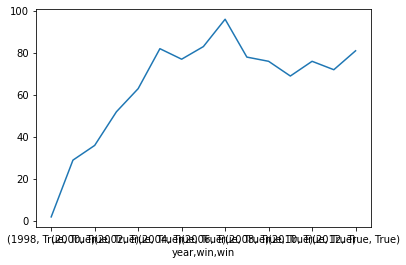

In [242]:
year_by_money = df.loc[df['win'] == True].groupby('year', sort=True)

# print(year_by_money.first())
print('Federer best years for tourmanent prize mone were 2010 and 2011')

year_by_wins = df.loc[df['win'] == True].groupby(['year', 'win'], sort=True)['win'].value_counts()
print(f"Federer's best year was {year_by_wins.idxmax()[0]} with {year_by_wins.max()}")

year_by_wins.plot()

print('Federer was better towards the second half of the data frame')

# 5.3 Total money won

In the data, you'll find the `tournament round`, one value of which, `F` indicates the final.

Assuming Federer wins the money in the `tournament prize money` if he wins a final in a tournament, how much money has Federer made in tournaments in this dataset?